In [1]:
import pandas as pd
from matplotlib import pyplot as plt

(244, 24)


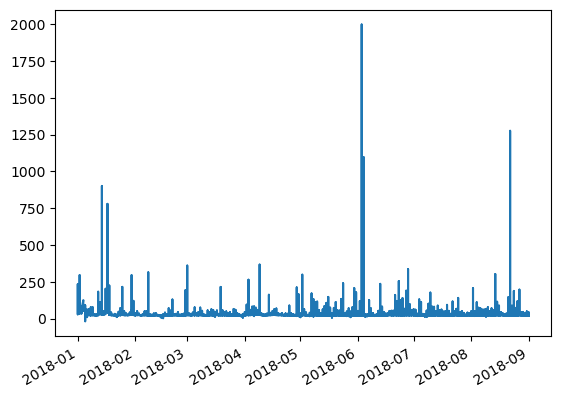

In [2]:
data = pd.read_csv("Data1.csv", index_col=0, parse_dates=True)

# Unroll the daily values to plot the timeseries. Note the spikes we wish to separate.
timeseries = data.stack()
timeseries.index = timeseries.index.droplevel(1)
timeseries.plot()

M = data.values
print(M.shape)

In [3]:
import numpy as np
from numpy.linalg import svd

# Define the helper functions
def svd_shrink(X, tau):
    U, s, Vt = svd(X, full_matrices=False)
    return U @ np.diag(shrink(s, tau)) @ Vt

def shrink(s, tau):
    return np.maximum(0, s - tau) - np.maximum(0, -s - tau)

def soft_threshold(X, tau):
    return np.sign(X) * np.maximum(0, np.abs(X) - tau)

# Set the parameter values
mu = 1/np.sqrt(max(M.shape))
lam = 1/np.sqrt(max(M.shape))
max_iter = 1000
tol = 1e-7

In [4]:
# Initialize the variables
L = np.zeros(M.shape)
S = np.zeros(M.shape)
Y = np.zeros(M.shape)

In [5]:
# Implement the algorithm
for i in range(max_iter):
    # Compute Lk+1
    L = svd_shrink(M - S - (1/mu)*Y, mu)
    
    # Compute Sk+1
    S = soft_threshold(M - L + (1/mu)*Y, lam*mu)
    
    # Compute Yk+1
    Y = Y + mu*(M - L - S)
    
    # Check for convergence
    if np.linalg.norm(M - L - S, 'fro')/np.linalg.norm(M, 'fro') < tol:
        break

In [6]:
# Return the results
L, S = L, S

## Results

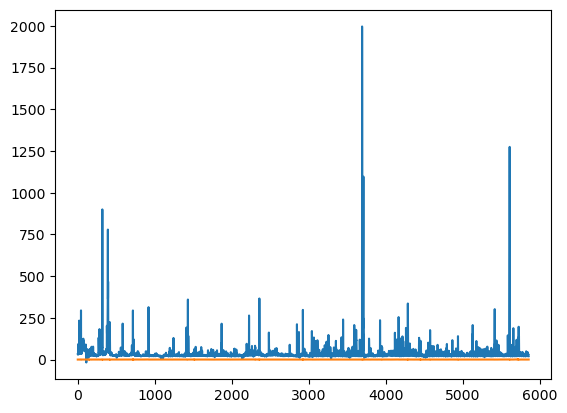

In [7]:
plt.plot(L.flatten())
plt.plot(S.flatten())